## Title of Research Paper


## Introduction
Write a brief introduction of your project (two to four para-graphs)

## Dataset Cleaning and Loading

- Name of your main dataset and additional datasets if you are using them in this report.
- Where are those data come from? In what format? (i.e. csv) In this project, all dataset files are in CSV format, so they could be directly loaded to jupyter notebook.
- When merging data from different datasets, it needs to identify fields are used to merge the datasets. In this step, we need to standardise data column name (for better readable code) and field format (i.e. all uppercase, remove unnecessary word/spaces, data type conversion if necessary).  
- When merging datasources, some data might not be availble from one of them, it needs to identify the impact and clearly state all assumptions.


In [18]:
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt

# load president_county_candidate.csv
president_county_cand = pd.read_csv('..\\Data\\president_county_candidate.csv')
#president_county_cand.head()

# load senate_county_candidate.csv
senate_county_cand = pd.read_csv('..\\Data\\senate_county_candidate.csv')
senate_county_cand.head()

# load governors_county_candidate.csv
governor_county_cand = pd.read_csv('..\\Data\\governors_county_candidate.csv')
governor_county_cand.head()

# load house_county_candidate.csv
house_cand = pd.read_csv('..\\Data\\house_candidate.csv')
house_cand.head()

# load US_Election_dataset_v1.csv
us_election = pd.read_csv("..\\Data\\US_Election_dataset_v1.csv")
#us_election.head()

# data cleaning: president_county_cand
# col 'state'
president_county_cand['state'] = president_county_cand['state'].str.upper()
president_county_cand['state'] = president_county_cand['state'].str.strip()
president_county_cand['state'] = president_county_cand['state'].str.replace(" ", "")
# col 'county'
president_county_cand['county'] = president_county_cand['county'].str.upper()
president_county_cand['county'] = president_county_cand['county'].str.strip()
president_county_cand['county'] = president_county_cand['county'].str.replace(" COUNTY", "")
# president_county_cand_won: filter in won is True
president_county_cand_won = president_county_cand.loc[president_county_cand['won'] == True].copy()
president_county_cand_won

# data cleaning: governor_county_cand
# col 'state'
governor_county_cand['state'] = governor_county_cand['state'].str.upper()
governor_county_cand['state'] = governor_county_cand['state'].str.strip()
# col 'County Name'
governor_county_cand['county'] = governor_county_cand['county'].str.upper()
governor_county_cand['county'] = governor_county_cand['county'].str.strip()
governor_county_cand['county'] = governor_county_cand['county'].str.replace(" COUNTY", "")
governor_county_cand['county'] = governor_county_cand['county'].str.upper()
# filter in won is True
governor_county_cand_won = governor_county_cand.loc[governor_county_cand['won'] == True].copy()

# data cleaning: house_cand
# col 'state'
house_cand['district'] = house_cand['district'].str.upper()
house_cand['district'] = house_cand['district'].str.strip()
# filter in won is True
house_cand_won = house_cand.loc[house_cand['won'] == True].copy()
#print(house_cand_won)

# data cleaning: senate_county_cand
# col 'state'
senate_county_cand['state'] = senate_county_cand['state'].str.upper()
senate_county_cand['state'] = senate_county_cand['state'].str.strip()
# col 'County Name'
senate_county_cand['county'] = senate_county_cand['county'].str.upper()
senate_county_cand['county'] = senate_county_cand['county'].str.strip()
senate_county_cand['county'] = senate_county_cand['county'].str.replace(" COUNTY", "")
senate_county_cand['county'] = senate_county_cand['county'].str.upper()
# filter in records with max total_votes (won)
senate_county_cand_won = senate_county_cand.copy()
idx = senate_county_cand_won.groupby(['state', 'county'])['total_votes'].idxmax()
senate_county_cand_won = senate_county_cand_won.loc[idx]
#print(senate_county_cand_won)

# data cleaning: us_election
us_election = us_election.rename({'State': 'state', 'County Name': 'county'}, axis=1)
# col 'state'
us_election['state'] = us_election['state'].str.upper()
us_election['state'] = us_election['state'].str.strip()
# col 'County Name'
us_election['county'] = us_election['county'].str.upper()
us_election['county'] = us_election['county'].str.strip()
us_election['county'] = us_election['county'].str.replace(" COUNTY", "")
us_election['county'] = us_election['county'].str.upper()
#us_election


In [22]:
# president_county_cand_won: prepare new columns
party_map = {'DEM': 0.0, 'REP': 1.0}
president_county_cand_won['Party_Index'] = president_county_cand_won['party'].map(party_map)
#print(president_county_cand_won.head())

# senate_county_cand_won: prepare new columns
senate_county_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in senate_county_cand_won['party']]
#print(senate_county_cand_won.head())

# governor_county_cand_won: prepare new columns
governor_county_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in governor_county_cand_won['party']]
#print(governor_county_cand_won.head())

# house_cand_won: prepare new columns
house_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in house_cand_won['party']]
#print(house_cand_won.head())

# us_election: prepare new columns
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.strip()
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.replace(',', '')
us_election['Median_Income'] = us_election['Median income (dollars)'].astype('float')
us_election['Won_Vote'] = us_election[["2020 Democrat vote raw","2020 Republican vote raw","2020 other vote raw"]].max(axis=1)
us_election['Total_Vote'] = us_election["2020 Democrat vote raw"] + us_election["2020 Republican vote raw"] + us_election["2020 other vote raw"]
us_election['Vote_Percentage'] = (us_election["Won_Vote"] / us_election["Total_Vote"]) * 100
us_election['Degree_Or_Higher_Percentage'] = us_election["Associates Degree"].str.rstrip('%').astype('float') + us_election["Bachelors Degree"].str.rstrip('%').astype('float') + us_election["Graduate or professional degree"].str.rstrip('%').astype('float')
#us_election.head()

final_df = pd.merge(president_county_cand_won, us_election, on=['state', 'county'], how="inner")
#print(final_df.count())


## Summary Statistics Tables
Create at least four plots/figures/histograms for a passing mark.\
State and describe the X and Y variables.
Party Index: 0 = democrat, 1 = Republican


|               |  Mean    | Median   |  Mode   |  Range               |  Min     |   Max     |  Count  | Standard Deviation  |
| ------------- | ------   | ------   | ------  | -------------------- | -----    | ------    | ------- | ------------------- |
| **Governor**  | 0.921951 | 1.0      | 1.0     | 0.0 - 1.0            | 0.0      | 1.0       | 1025    | 0.268379            |
| **House**     | 0.488532 | 0.0      | 0.0     | 0.0 - 1.0            | 0.0      | 1.0       | 436     | 0.500443            |
| **Senate**    | 0.309378 | 0.0      | 0.0     | 0.0 - 1.0            | 0.0      | 1.0       | 3423    | 0.462305            |
| **Income**    | 63305.60 | 60931.00 | 6125.00 | 17900.00 - 170463.00 | 17900.00 | 170463.00 | 3142    | 16819.01            |
| **Education** | 33.11%   | 31.60%   | 34.50%  | 7.50% - 81.00%       | 81.00%   | 7.50%     | 3143    | 10.40%              |
| **XXX**       |          |          |         |                      |          |           |         |                     |
| **XXX**       |          |          |         |                      |          |           |         |                     |




In [23]:
# Get statistics

print("\n====================")
print("Governor:")
print("====================")
print(governor_county_cand_won['Party_Index'].describe())
print("\n====================")
print("Governor - MEDIAN:")
print("====================")
print(governor_county_cand_won['Party_Index'].median())
print("\n====================")
print("Governor - MODE:")
print("====================")
print(governor_county_cand_won['Party_Index'].mode())

print("\n====================")
print("House:")
print("====================")
print(house_cand_won['Party_Index'].describe())
print("\n====================")
print("House - MEDIAN:")
print("====================")
print(house_cand_won['Party_Index'].median())
print("\n====================")
print("House - MODE:")
print("====================")
print(house_cand_won['Party_Index'].mode())

print("\n====================")
print("Senate:")
print("====================")
print(senate_county_cand_won['Party_Index'].describe())
print("\n====================")
print("Senate - MEDIAN:")
print("====================")
print(senate_county_cand_won['Party_Index'].median())
print("\n====================")
print("Senate - MODE:")
print("====================")
print(senate_county_cand_won['Party_Index'].mode())

# generate statistics
print("\n====================")
print("4 Variables:")
print("====================")
columns = ["Median_Income", "Degree_Or_Higher_Percentage", "Density per square km", "Gini Index"]
print(us_election[columns].describe().transpose())
print("\n====================")
print("4 Variables - MEDIAN:")
print("====================")
print(us_election[columns].median())
print("\n====================")
print("4 Variables - MODE:")
print("====================")
print(us_election[columns].mode())





Governor:
count    1025.000000
mean        0.921951
std         0.268379
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Party_Index, dtype: float64

Governor - MEDIAN:
1.0

Governor - MODE:
0    1.0
Name: Party_Index, dtype: float64

House:
count    436.000000
mean       0.488532
std        0.500443
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Party_Index, dtype: float64

House - MEDIAN:
0.0

House - MODE:
0    0.0
Name: Party_Index, dtype: float64

Senate:
count    3423.000000
mean        0.309378
std         0.462305
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Party_Index, dtype: float64

Senate - MEDIAN:
0.0

Senate - MODE:
0    0.0
Name: Party_Index, dtype: float64

4 Variables:
                              count          mean           std         min  \
Median_Income                3142.0 

## Plots, Histograms, Figures

Create at least four plots/figures/histograms for a passing mark.

### Graph-1: No. of Counties Won against Party in President Election

[Text(0, 0, '514'), Text(0, 0, '2575')]

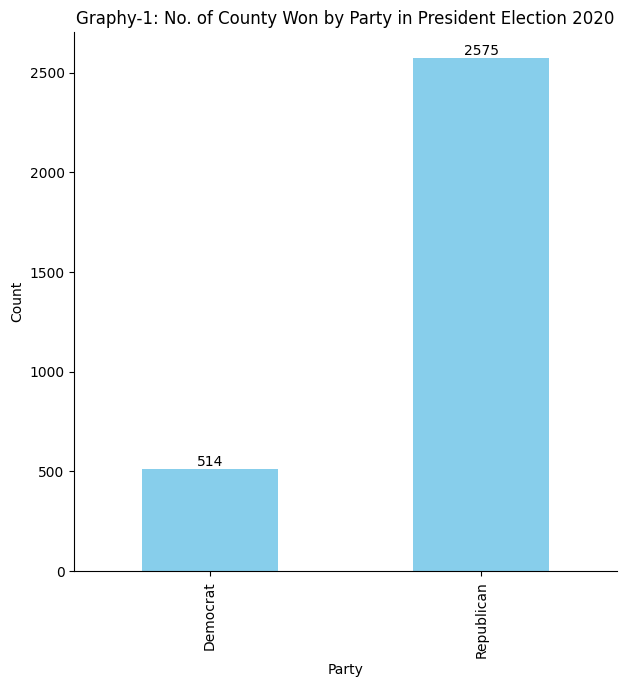

In [6]:
# party dict
party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
final_df['party'] = final_df['party'].map(lambda x: party_dict.get(x, 'Third-Party'))

# calculate value counts
counts = final_df['party'].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))
counts.sort_index().plot(kind='bar', color='skyblue')

# plot barchart
ax.set_xlabel('Party')
ax.set_ylabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Graphy-1: No. of County Won by Party in President Election 2020")
ax.bar_label(ax.containers[0])


### Graph-2: Percentage of votes won within county vs Median Income

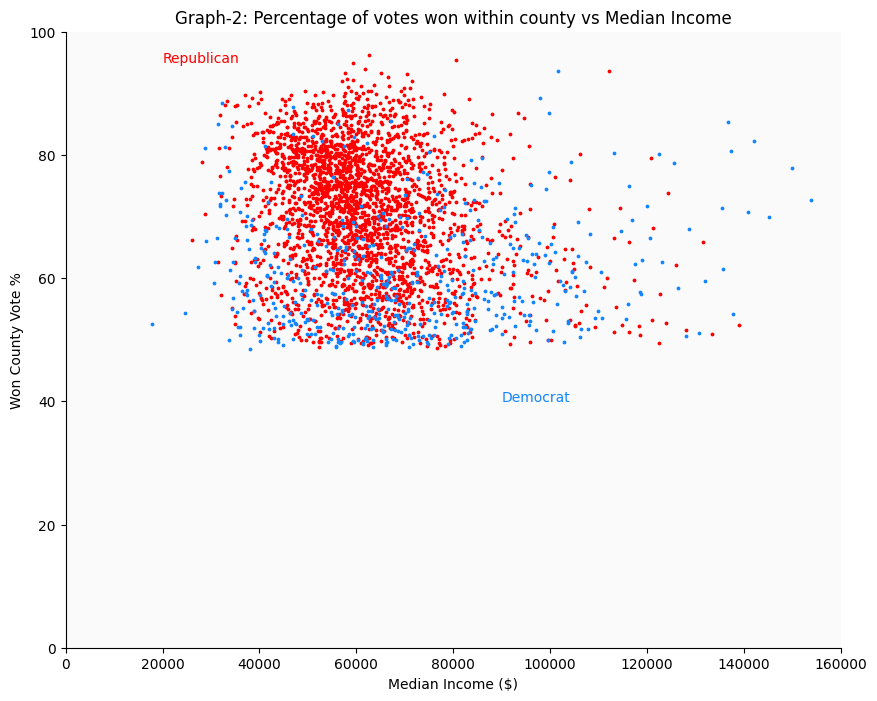

In [7]:
# Graph-2: Percentage of votes won within county vs Median Income
fig, ax = plt.subplots(figsize=(10, 8))

# select columns to be ploted
data_df = final_df[['Median_Income', 'Vote_Percentage', 'party']]

bgcolor = (250/255, 250/255, 250/255)

# plot chart
colors = {'Democrat': '#1385ff', 'Republican': 'red', 'Third-Party': 'purple'}

rep_df = data_df[data_df['party']=='Republican']
rep_df.plot.scatter(x="Median_Income", y="Vote_Percentage", ax=ax, color=colors['Republican'], s=3)
dem_df = data_df[data_df['party']=='Democrat']
dem_df.plot.scatter(x="Median_Income", y="Vote_Percentage", ax=ax, color=colors['Democrat'], s=3)
other_df = data_df[data_df['party']=='Third-Party']
other_df.plot.scatter(x="Median_Income", y="Vote_Percentage", ax=ax, color=colors['Third-Party'], s=3)

# set title and labels
ax.set_xlabel('Median Income ($)')
ax.set_ylabel('Won County Vote %')
ax.set_title("Graph-2: Percentage of votes won within county vs Median Income")
ax.set_facecolor(bgcolor)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 100)
ax.set_xlim((0, 160000))

ax.annotate("Democrat", (90000, 40), color=colors["Democrat"])
ax.annotate("Republican", (20000, 95), color=colors["Republican"]);
ax.set_zorder(1)

### Graph-3: Percentage of votes won within county vs Education


Text(0.5, 1.0, 'Democrat')

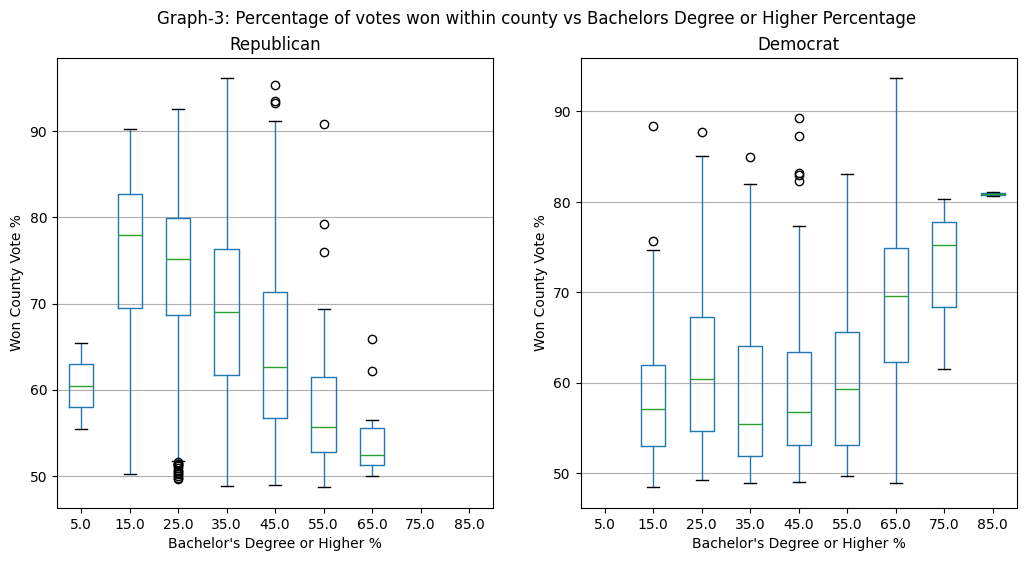

In [8]:
# Graph-3: Percentage of votes won within county vs Education
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# select columns to be ploted
data_df = final_df[["Degree_Or_Higher_Percentage", "Vote_Percentage", "party"]]

# group Education attainment in range
education_bins = np.arange(0, 100, 10)
g2_df = data_df.copy()
g2_df['EducationGroup'] = pd.cut(data_df["Degree_Or_Higher_Percentage"], bins=education_bins)
g2_df['EducationGroupMid'] = g2_df['EducationGroup'].apply(lambda x: x.mid)
rep_df = g2_df[g2_df['party']=='Republican'].copy()
rep_df.boxplot(by='EducationGroupMid', column =['Vote_Percentage'], ax=ax[0], grid = False) 
dem_df = g2_df[g2_df['party']=='Democrat'].copy()
dem_df.boxplot(by='EducationGroupMid', column =['Vote_Percentage'], ax=ax[1], grid = False) 


fig.suptitle("Graph-3: Percentage of votes won within county vs Bachelors Degree or Higher Percentage")
ax[0].grid(axis='y')
ax[0].set_xlabel("Bachelor's Degree or Higher %")
ax[0].set_ylabel('Won County Vote %')
ax[0].set_title("Republican")
ax[1].grid(axis='y')
ax[1].set_xlabel("Bachelor's Degree or Higher %")
ax[1].set_ylabel('Won County Vote %')
ax[1].set_title("Democrat")

### Graph-4: Percentage of votes won within county vs XXXX

### Graph-5: No. of votes for each party vs State

### Graph-5: Vote share for each party vs XXXX

### Graph-5: Proportion of counties won by each party vs Eelection Type

## Conclusion
Explain your findings in brief and scientic language. The minimum length for the conclusion in this project is one paragraph. Your
conclusion should briey summarize the takeaways from your project.

## Research Summary
Please provide a one-paragraph description covering the following. We want exactly one paragraph (4-5 lines). Longer responses will result in formatting penalties.

- **Research Question:** Clearly state your research question or hypothesis.
- **Data Source and Structure:** Describe the data source and structure (e.g.,firm-year level, individual-level, etc.).
- **Outcome Variable(s) and Variable(s) of Interest:** Defne your outcome variable(s) and key variables of interest.

This paragraph ensures clarity and consistency. Use the same description in futurereports if unchanged.



In [ ]:
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt

df = pd.read_csv('..\Data\socioeconomic_voting.csv')
df.head()

**Summary Statistics**

In [ ]:
df = pd.read_csv('..\Data\socioeconomic_voting.csv')
columns = ["County Median Household Income (2021)", "Unemployment Rate 2020", "Bachelor's Degree or Higher Percentage (2018-2022)", "Urban Influence Code 2013"]
df[columns].describe()

In [ ]:
print("Median:")
df[columns].median()

In [ ]:
print("Median:")
df[columns].mode()

## Four Visualization
For this section, just give us **4** plots back to back.

**Dataset Information**

Create four different visualizations using your variables.

1. Use bar plots, histograms, line plots, etc. (no maps).
2. Ensure each plot has a clear and descriptive title.
3. Visualizations must be relevant to your research question.


**Graph-1: No. of Counties Won against Party in President Election**


In [ ]:
#Graph-1: No. of Counties Won against Party in President Election

president_county_cand = pd.read_csv('..\Data\president_county_candidate.csv')
party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
president_county_cand['party'] = president_county_cand['party'].map(lambda x: party_dict.get(x, 'Third-Party'))

# Get all Won records
result = president_county_cand[(president_county_cand['won'] == True)]

# Calculate value counts
counts = result['party'].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))
counts.sort_index().plot(kind='bar', color='skyblue')

# Plot barchart
ax.set_xlabel('Party')
ax.set_ylabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Graphy-1: No. of County Won by Party in President Election 2020")
ax.bar_label(ax.containers[0])



In [ ]:
president_county_cand = pd.read_csv('..\Data\president_county_candidate.csv')
party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
president_county_cand['party'] = president_county_cand['party'].map(lambda x: party_dict.get(x, 'Third-Party'))

# combine towns into county for some states
def combine_by_county_list(ddf: pd.DataFrame, state: str, county: str, county_list: list) -> pd.DataFrame:

    # select all target rows
    #print("Filtered_df:")
    filtered_df = ddf[ddf['county'].isin(county_list) & (ddf['state'] == state_name)]
    #print(filtered_df)

    # combined the selected rows
    combined_df = filtered_df.groupby(['state', 'candidate', 'party', 'won']).agg(
    total_votes=('total_votes', 'sum')).reset_index()

    # add col 'county' to combined_df
    combined_df['county'] = county
    #print(combined_df)
    
    # remove the matched counties rows
    updated_df = ddf[ ~ddf['county'].isin(county_list) & (ddf['state'] != state_name)]
    #print(updated_df)

    # add new row
    updated_df = pd.concat([updated_df, combined_df], ignore_index=True)
    
    return updated_df


# data cleaning
# president county candidate
# col 'state'
president_county_cand['state'] = president_county_cand['state'].str.upper()
president_county_cand['state'] = president_county_cand['state'].str.strip()
# col 'county'
president_county_cand['county'] = president_county_cand['county'].str.upper()
president_county_cand['county'] = president_county_cand['county'].str.strip()
president_county_cand['county'] = president_county_cand['county'].str.replace(" COUNTY", "")

president_county_cand = president_county_cand.loc[president_county_cand['won'] == True]
#print(president_county_cand.count())

# consolidate multiple towns to one county record for 'DISTRICT OF COLUMBIA'
state_name = 'DISTRICT OF COLUMBIA'
county_name = 'DISTRICT OF COLUMBIA'
county_match_list = ['DISTRICT OF COLUMBIA', 'WARD 2', 'WARD 3', 'WARD 4', 'WARD 5', 'WARD 6', 'WARD 7', 'WARD 8']

pcc_df = combine_by_county_list(president_county_cand, state_name, county_name, county_match_list)
#print(pcc_df.loc[df['state'] == state_name])
#print(pcc_df)

#state_name = 'CONNECTICUT'
#county_name = 'FAIRFIELD'
#county_match_list = ["BETHEL",	"BRIDGEPORT",	"BROOKFIELD",	"DANBURY",	"DARIEN",	"EASTON",	"FAIRFIELD",	"GREENWICH",	
#                     "MONROE",	"NEW CANAAN",	"NEW FAIRFIELD",	"NEWTOWN",	"NORWALK",	"REDDING",	"RIDGEFIELD",	"SHELTON",	
#                     "SHERMAN",	"STAMFORD",	"STRATFORD",	"TRUMBULL",	"WESTON",	"WESTPORT",	"WILTON",]
#ccc = combine_by_county_list(pcc_df, state_name, county_name, county_match_list)
#print(pcc_df.loc[df['state'] == state_name])
#print(ccc)



# socioeconomic voting
soc_econ_voting = pd.read_csv('..\Data\socioeconomic_voting.csv')
# data cleaning
sev_df = soc_econ_voting.rename({'State': 'state', 'County Name': 'county'}, axis=1)
# col 'state'
sev_df['state'] = sev_df['state'].str.upper()
sev_df['state'] = sev_df['state'].str.strip()
# col 'County Name'
sev_df['county'] = sev_df['county'].str.upper()
sev_df['county'] = sev_df['county'].str.strip()
sev_df['county'] = sev_df['county'].str.replace(" COUNTY", "")
print(sev_df.count())
#sev_df



final_df = pd.merge(pcc_df, sev_df, on=['state', 'county'], how="inner")
print(final_df.count())
     



**Graph-2: Percentage of votes won within county vs Median Income**

In [ ]:
# Graph-2: Percentage of votes won within county vs Median Income
fig, ax = plt.subplots(figsize=(9, 7))

# select columns to be ploted
data_df = final_df[['County Median Household Income (2021)', 'Vote Percentage', 'party']]

# group Household Income in range
#income_bins = np.arange(20000, 180000, 2000)
#data_df['IncomeGroup'] = pd.cut(data_df['County Median Household Income (2021)'], bins=income_bins)
#print(data_df)
#g2_df = data_df.groupby('IncomeGroup').agg(
#                Count=('Vote Percentage', 'size'),
#                Averge_Vote_Percentage=('Vote Percentage', 'mean')
#                ).reset_index()
#g2_df['IncomeGroup_Mid'] = g2_df['IncomeGroup'].apply(lambda x: x.mid)
#print(g2_df)

bgcolor = (250/255, 250/255, 250/255)


# plot chart
colors = {'Democrat': '#1385ff', 'Republican': 'red', 'Third-Party': 'purple'}
#data_df.plot.scatter(x="County Median Household Income (2021)", y="Vote Percentage", ax=ax, color=colors['party'], s=3)

rep_df = data_df[data_df['party']=='Republican']
rep_df.plot.scatter(x="County Median Household Income (2021)", y="Vote Percentage", ax=ax, color=colors['Republican'], s=3)
dem_df = data_df[data_df['party']=='Democrat']
dem_df.plot.scatter(x="County Median Household Income (2021)", y="Vote Percentage", ax=ax, color=colors['Democrat'], s=3)
other_df = data_df[data_df['party']=='Third-Party']
other_df.plot.scatter(x="County Median Household Income (2021)", y="Vote Percentage", ax=ax, color=colors['Third-Party'], s=3)

# set title and labels
ax.set_xlabel('Median Household Income ($)')
ax.set_ylabel('Won County Vote %')
ax.set_title("Graph-2: Percentage of votes won within county vs Median Income")
ax.set_facecolor(bgcolor)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 100)
ax.set_xlim((0, 160000))

ax.annotate("Democrat", (90000, 15), color=colors["Democrat"])
ax.annotate("Republican", (15000, 93), color=colors["Republican"]);
ax.set_zorder(1)

**Graph-3: Percentage of votes won within county vs Median Income**

In [ ]:
# Graph-3: Percentage of votes won within county vs Median Income

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# select columns to be ploted
data_df = final_df[["Bachelor's Degree or Higher Percentage (2018-2022)", "Vote Percentage", "party"]]

# group Education attainment in range
education_bins = np.arange(0, 100, 10)
g2_df = data_df.copy()
g2_df['EducationGroup'] = pd.cut(data_df["Bachelor's Degree or Higher Percentage (2018-2022)"], bins=education_bins)
g2_df['EducationGroupMid'] = g2_df['EducationGroup'].apply(lambda x: x.mid)
rep_df = g2_df[g2_df['party']=='Republican'].copy()
rep_df.boxplot(by='EducationGroupMid', column =['Vote Percentage'], ax=ax[0], grid = False) 
dem_df = g2_df[g2_df['party']=='Democrat'].copy()
dem_df.boxplot(by='EducationGroupMid', column =['Vote Percentage'], ax=ax[1], grid = False) 


fig.suptitle("Graph-3: Percentage of votes won within county vs Bachelor's Degree or Higher Percentage")
ax[0].grid(axis='y')
ax[0].set_xlabel("Bachelor's Degree or Higher %")
ax[0].set_ylabel('Won County Vote %')
ax[0].set_title("Republican")
ax[1].grid(axis='y')
ax[1].set_xlabel("Bachelor's Degree or Higher %")
ax[1].set_ylabel('Won County Vote %')
ax[1].set_title("Democrat")


In [ ]:
# Graph-4: Percentage of votes won within county vs Unemployment rate

fig, ax = plt.subplots(figsize=(8, 6))

# select columns to be ploted
data_df = final_df[["Unemployment Rate 2020", "Vote Percentage", "party"]]

# group Education attainment in range
unemployment_bins = np.arange(0, 25, 1)
x_ticks = np.arange(0, 25, 2)

# plot chart
colors = {'Democrat': '#1385ff', 'Republican': 'red', 'Third-Party': 'purple'}

g2_df = data_df.copy()
g2_df['UnemploymentRateGroup'] = pd.cut(data_df["Unemployment Rate 2020"], bins=unemployment_bins)

# create count of Vote Percentage and Average of Vote Percentage
g2_df = g2_df.groupby(['UnemploymentRateGroup', 'party'], observed=False).agg(
                Averge_Vote_Percentage=('Vote Percentage', 'mean')
                ).reset_index()
g2_df['UnemploymentRateGroupMid'] = g2_df['UnemploymentRateGroup'].apply(lambda x: x.mid)
g2_df.set_index('UnemploymentRateGroupMid', inplace=True)

rep_df = g2_df[g2_df['party']=='Republican']
rep_df = rep_df['Averge_Vote_Percentage'].fillna(0)
rep_df.plot(y='Averge_Vote_Percentage', ax=ax, legend=False, color=colors["Republican"], xticks=x_ticks)

dem_df = g2_df[g2_df['party']=='Democrat']
dem_df = dem_df['Averge_Vote_Percentage'].fillna(0)
dem_df.plot(y='Averge_Vote_Percentage' , ax=ax, legend=False, color=colors["Democrat"], xticks=x_ticks)

#other_df = g2_df[g2_df['party']=='Third-Party']
#other_df = other_df['Averge_Vote_Percentage'].fillna(0)
#other_df.plot(y='Averge_Vote_Percentage' , ax=ax, legend=False, color=colors["Third-Party"], xticks=x_ticks)


# No cut() and groupby
#dem_df = data_df[data_df['party']=='Republican']
#dem_df.set_index('Unemployment Rate 2020', inplace=True)
#dem_df.sort_index(inplace=True)
#dem_df.plot(y='Vote Percentage' , ax=ax, legend=False, color=colors["Republican"])

#rep_df = data_df[data_df['party']=='Democrat']
#rep_df.set_index('Unemployment Rate 2020', inplace=True)
#rep_df.sort_index(inplace=True)
#rep_df.plot(y='Vote Percentage' , ax=ax, legend=False, color=colors["Democrat"])

#other_df = data_df[data_df['party']=='Third-Party']
#other_df.set_index('Unemployment Rate 2020', inplace=True)
#other_df.sort_index(inplace=True)
#other_df.plot(y='Vote Percentage' , ax=ax, legend=False, color=colors["Third-Party"])

ax.grid(axis='y')
ax.set_xlabel("Unemployment Rate %")
ax.set_ylabel('Won County Vote %')
ax.set_title("Graph-4: Percentage of votes won within county vs Unemployment Rate")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_ylim(0, 100)
#ax.set_xlim((0, 160000))

ax.annotate("Democrat", (4.6, 44), color=colors["Democrat"])
ax.annotate("Republican", (2.7, 83), color=colors["Republican"]);
